# Multiple regression on all data points (not means)

Previously I did the regressions on means (data averaged for every `instances_n` values).
`~krzadca` pointed out that it might be better to use all data points.

In [1]:
from helpers.helpers_old import (
    add_instances_n,
    draw_regression_graph,
    fit_regression,
    get_experiments_data,
    get_attach_indexes,
    get_data_with_metrics,
)

experiments_path = '../../data'

## Redis YCSB 6x10min

In [2]:
experiment_name = 'redis_ycsb_6x10'

exp_name, df = next(get_data_with_metrics(experiment_name, experiments_path, instances_n=6))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1590502163,1590502164,0.078133,9606.147935,1686.0,4.167684e+09,1.0
1,1590502224,1590502225,0.080170,9532.888465,1677.0,4.168221e+09,1.0
2,1590502285,1590502285,0.074826,10362.694301,1659.0,4.167287e+09,1.0
3,1590502346,1590502346,0.074463,10438.413361,1747.0,4.181807e+09,1.0
4,1590502407,1590502406,0.078476,9910.802775,1763.0,4.262556e+09,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     624.8
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           4.43e-34
Time:                        15:34:55   Log-Likelihood:                 275.92
No. Observations:                  64   AIC:                            -547.8
Df Residuals:                      62   BIC:                            -543.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0698      0.001     74.920      

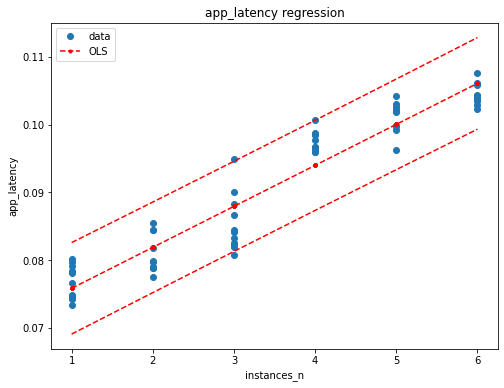

In [3]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')

### `app_latency` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     632.6
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           3.12e-34
Time:                        15:34:55   Log-Likelihood:                 276.28
No. Observations:                  64   AIC:                            -548.6
Df Residuals:                      62   BIC:                            -544.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0657      0.001     61.002      0.0

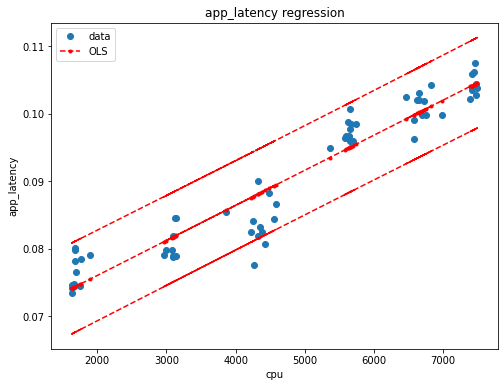

In [4]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')

### `app_latency` ~ `instances_n` + `cpu`

In [5]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     330.9
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.79e-33
Time:                        15:34:55   Log-Likelihood:                 278.07
No. Observations:                  64   AIC:                            -550.1
Df Residuals:                      61   BIC:                            -543.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0675      0.001     46.846      

### Single variable plots

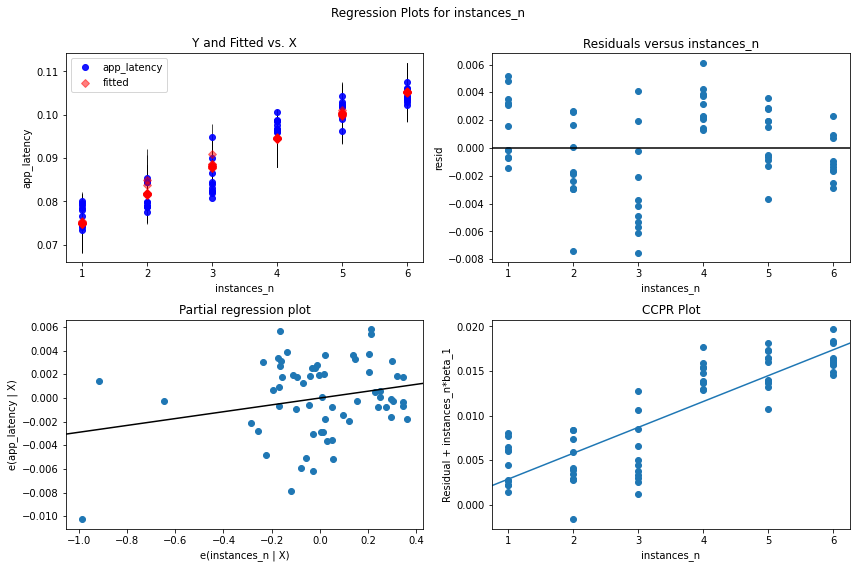

In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

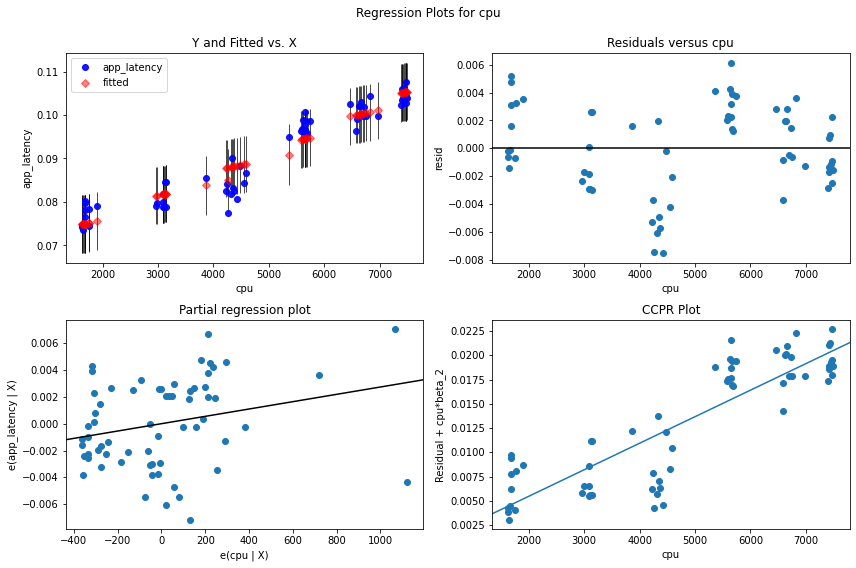

In [7]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     2602.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           2.41e-52
Time:                        15:34:56   Log-Likelihood:                -456.45
No. Observations:                  64   AIC:                             916.9
Df Residuals:                      62   BIC:                             921.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     842.6536     86.892      9.698      

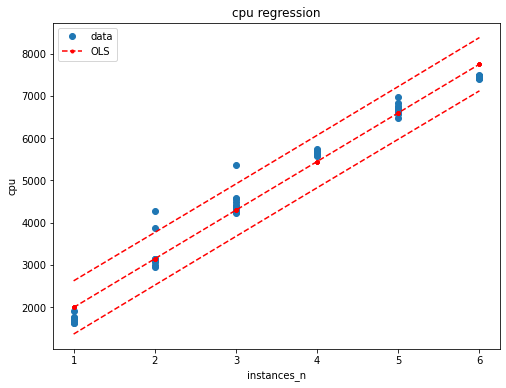

In [8]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

## Redis YCSB 12x10min

In [9]:
experiment_name = 'redis_ycsb_12x10'

exp_name, df = next(get_data_with_metrics(experiment_name, experiments_path, instances_n=12))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1590635972,1590635970,0.073216,10570.824524,1650.0,6.057599e+09,1.0
1,1590636022,1590636020,0.076797,10183.299389,1670.0,5.943132e+09,1.0
2,1590636083,1590636081,0.075290,10266.940452,1638.0,6.086791e+09,1.0
3,1590636144,1590636141,0.074385,10416.666667,1653.0,6.058856e+09,1.0
4,1590636205,1590636202,0.075853,10309.278351,1660.0,6.007448e+09,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1964.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           8.08e-76
Time:                        15:34:57   Log-Likelihood:                 469.10
No. Observations:                 121   AIC:                            -934.2
Df Residuals:                     119   BIC:                            -928.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0699      0.001     71.810      

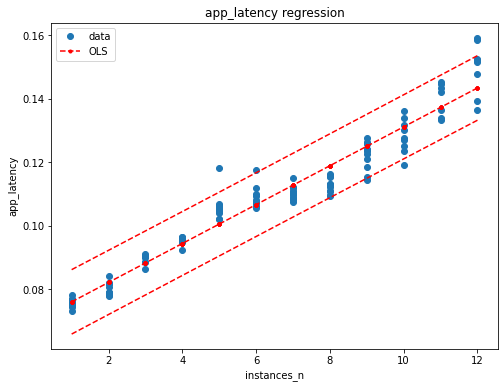

In [10]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

### `app_latency` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     913.8
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.12e-57
Time:                        15:34:57   Log-Likelihood:                 426.65
No. Observations:                 121   AIC:                            -849.3
Df Residuals:                     119   BIC:                            -843.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0568      0.002     31.348      0.0

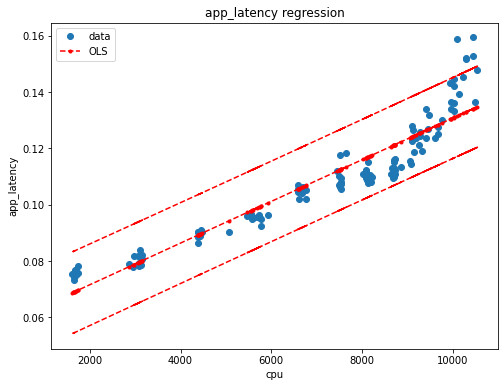

In [11]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')
print(results.summary())

### `app_latency` ~ `instances_n` + `cpu`

In [12]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     973.8
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           4.50e-74
Time:                        15:34:58   Log-Likelihood:                 469.10
No. Observations:                 121   AIC:                            -932.2
Df Residuals:                     118   BIC:                            -923.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0699      0.002     39.941      

### Single variable plots

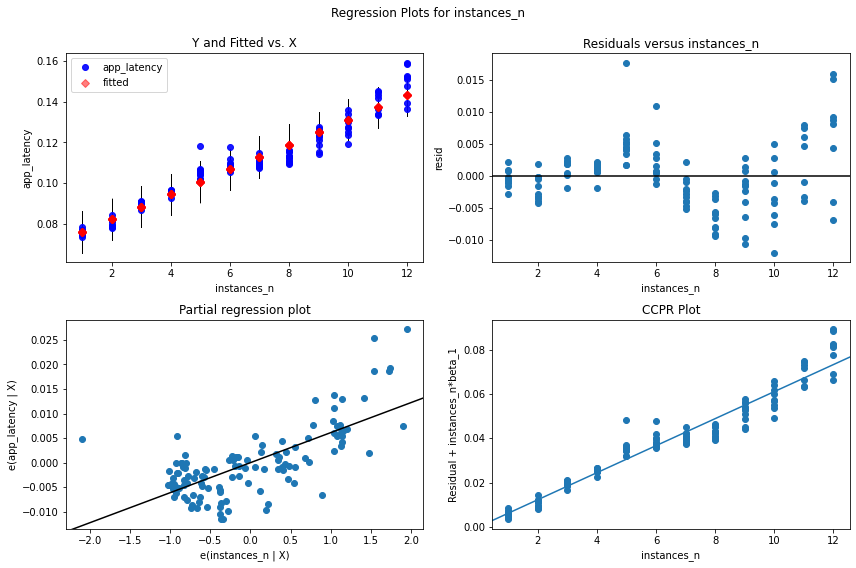

In [13]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

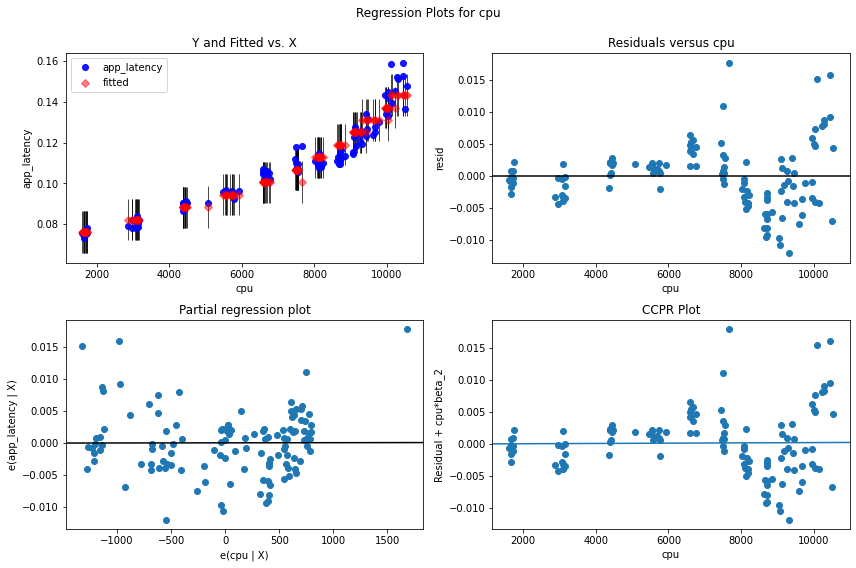

In [14]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1801.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.03e-73
Time:                        15:34:59   Log-Likelihood:                -958.06
No. Observations:                 121   AIC:                             1920.
Df Residuals:                     119   BIC:                             1926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2088.5088    129.048     16.184      

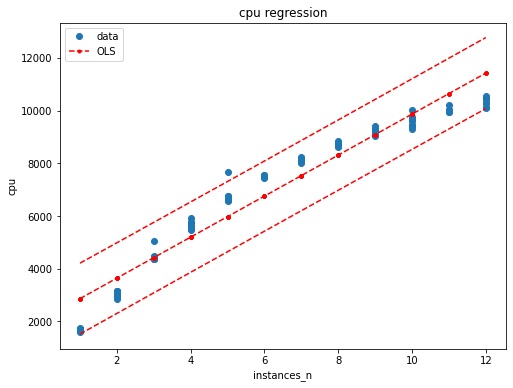

In [15]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

## Redis YCSB 12x20min

In [16]:
experiment_name = 'redis_ycsb_12x20'

exp_name, df = next(get_data_with_metrics(experiment_name, experiments_path, instances_n=12))

print(len(df))
df.head()

235


,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1591872872,1591872871,0.079693,9487.666034,1572.0,4.553658e+09,1.0
1,1591872933,1591872932,0.078356,10040.160643,1627.0,4.483006e+09,1.0
2,1591872994,1591872992,0.077941,9950.248756,1655.0,4.633547e+09,1.0
3,1591873055,1591873053,0.076327,10080.645161,1704.0,4.555633e+09,1.0
4,1591873111,1591873113,0.082048,9199.632015,1638.0,4.475527e+09,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     2932.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):          5.47e-134
Time:                        15:35:00   Log-Likelihood:                 874.17
No. Observations:                 235   AIC:                            -1744.
Df Residuals:                     233   BIC:                            -1737.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0696      0.001     85.747      

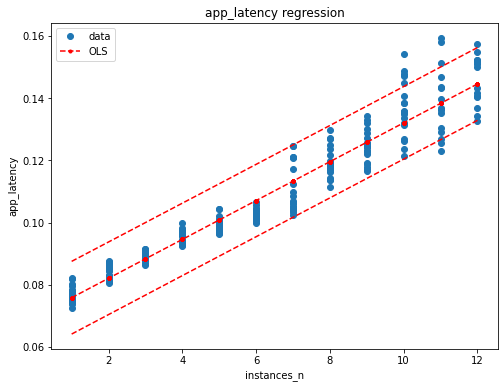

In [17]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

### `app_latency` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1187.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           2.10e-93
Time:                        15:35:01   Log-Likelihood:                 779.97
No. Observations:                 235   AIC:                            -1556.
Df Residuals:                     233   BIC:                            -1549.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0582      0.002     37.186      0.0

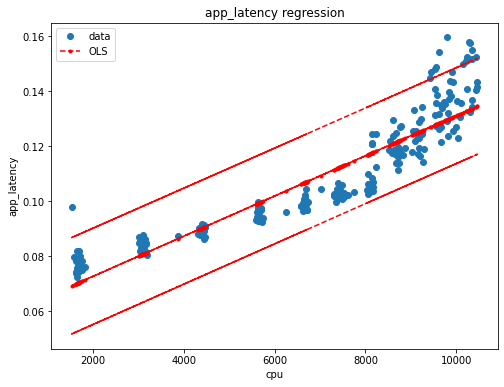

In [18]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')
print(results.summary())

### `app_latency` ~ `instances_n` + `cpu`

In [19]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1524.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):          3.63e-134
Time:                        15:35:01   Log-Likelihood:                 878.86
No. Observations:                 235   AIC:                            -1752.
Df Residuals:                     232   BIC:                            -1741.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0729      0.001     54.861      

### Single variable plots

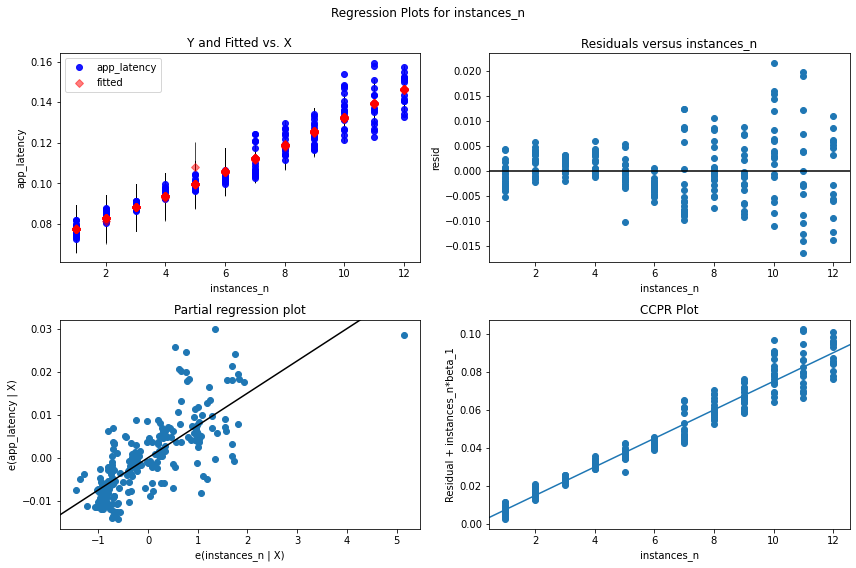

In [20]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

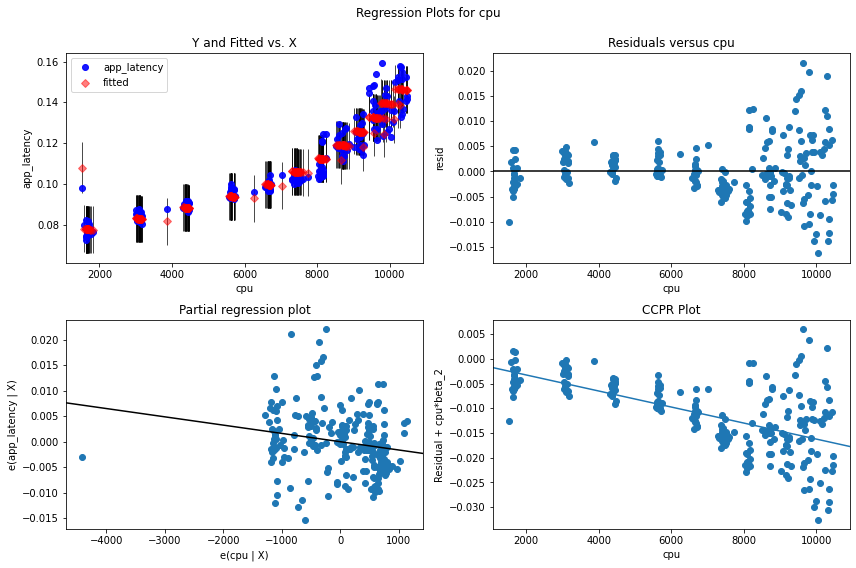

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3117.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):          7.17e-137
Time:                        15:35:02   Log-Likelihood:                -1877.8
No. Observations:                 235   AIC:                             3760.
Df Residuals:                     233   BIC:                             3767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2011.1317     98.907     20.333      

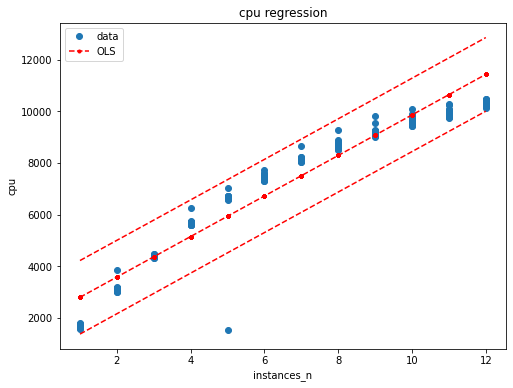

In [22]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

## Linpack 6x10min

In [23]:
experiment_name = 'linpack_6x10'

exp_name, df = next(get_data_with_metrics(experiment_name, experiments_path, instances_n=6))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1590625097,1590625102,NaN,33.2244,2030.0,5.366915e+09,1.0
1,1590625167,1590625163,NaN,33.2747,2047.0,5.345997e+09,1.0
2,1590625227,1590625223,NaN,33.3156,2017.0,5.345898e+09,1.0
3,1590625287,1590625284,NaN,33.4095,2063.0,5.328142e+09,1.0
4,1590625347,1590625344,NaN,33.3053,2016.0,5.329502e+09,1.0


### `app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     311.6
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           2.25e-22
Time:                        15:35:02   Log-Likelihood:                -104.89
No. Observations:                  49   AIC:                             213.8
Df Residuals:                      47   BIC:                             217.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.6631      0.648     56.540      

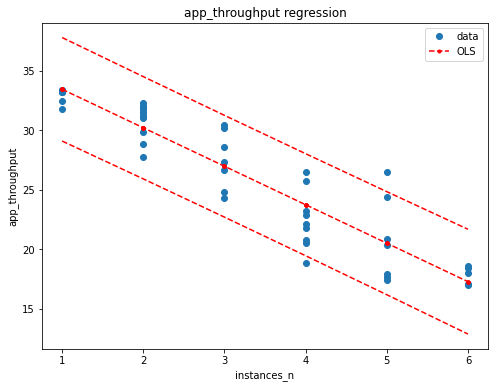

In [24]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')

### `app_throughput` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     318.5
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.44e-22
Time:                        15:35:03   Log-Likelihood:                -104.42
No. Observations:                  49   AIC:                             212.8
Df Residuals:                      47   BIC:                             216.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.8626      0.702     53.950      0.0

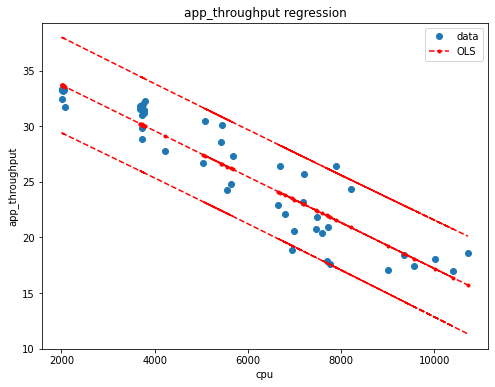

In [25]:
results = fit_regression(data=df, formula='app_throughput ~ cpu')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_throughput', variable='cpu')

### `app_throughput` ~ `instances_n` + `cpu`

In [26]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     161.8
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.53e-21
Time:                        15:35:03   Log-Likelihood:                -103.62
No. Observations:                  49   AIC:                             213.2
Df Residuals:                      46   BIC:                             218.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      37.3975      0.793     47.156      

### Single variable plots

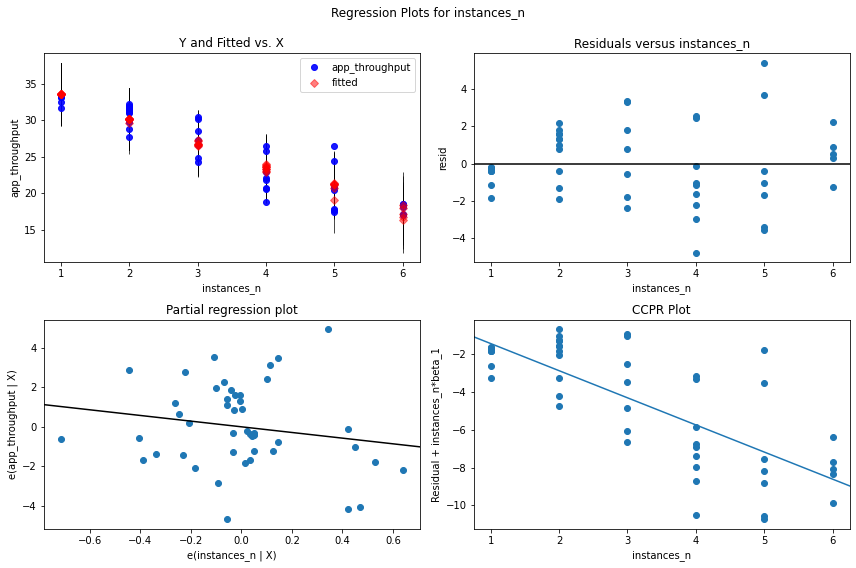

In [27]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

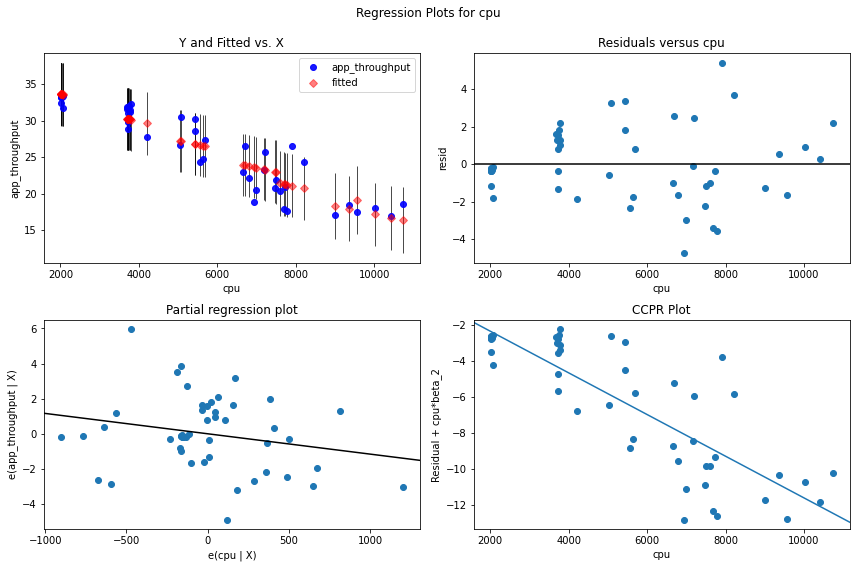

In [28]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1909.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.04e-39
Time:                        15:35:04   Log-Likelihood:                -362.91
No. Observations:                  49   AIC:                             729.8
Df Residuals:                      47   BIC:                             733.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     633.3810    125.536      5.045      

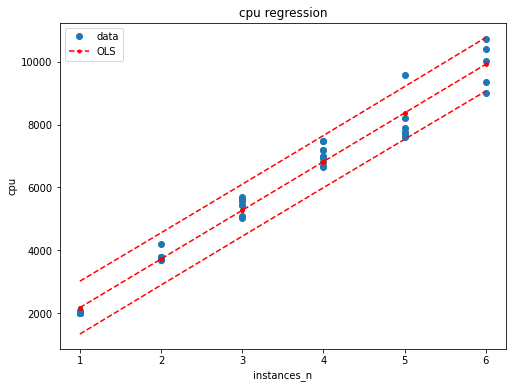

In [29]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

## Linpack 12x10min

In [30]:
experiment_name = 'linpack_12x10'

exp_name, df = next(get_data_with_metrics(experiment_name, experiments_path, instances_n=12))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1590687141,1590687146,NaN,33.4191,2071.0,6.660665e+09,1.0
1,1590687211,1590687207,NaN,33.1738,2035.0,6.646727e+09,1.0
2,1590687271,1590687267,NaN,33.3837,2056.0,6.647034e+09,1.0
3,1590687331,1590687328,NaN,33.2996,2024.0,6.646743e+09,1.0
4,1590687391,1590687388,NaN,33.4040,2055.0,6.643663e+09,1.0


### `app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1029.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.53e-45
Time:                        15:35:05   Log-Likelihood:                -168.69
No. Observations:                  77   AIC:                             341.4
Df Residuals:                      75   BIC:                             346.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.7215      0.470     73.917      

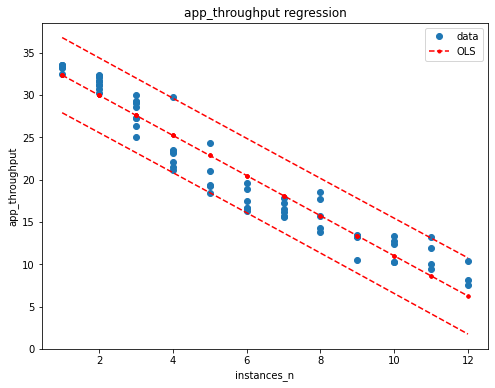

In [31]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')
print(results.summary())

### `app_throughput` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1245.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.88e-48
Time:                        15:35:05   Log-Likelihood:                -161.81
No. Observations:                  77   AIC:                             327.6
Df Residuals:                      75   BIC:                             332.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.3423      0.543     72.447      0.0

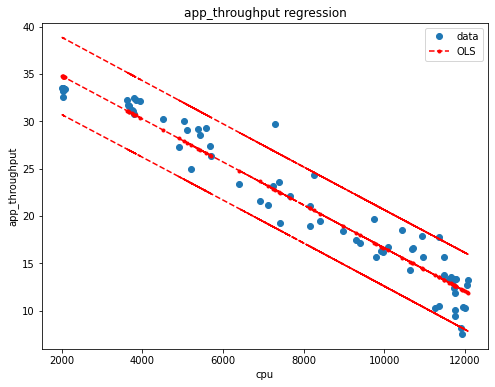

In [32]:
results = fit_regression(data=df, formula='app_throughput ~ cpu')
draw_regression_graph(results, df, metric_name='app_throughput', variable='cpu')
print(results.summary())

### `app_throughput` ~ `instances_n` + `cpu`

In [33]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     891.5
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.64e-52
Time:                        15:35:05   Log-Likelihood:                -148.14
No. Observations:                  77   AIC:                             302.3
Df Residuals:                      74   BIC:                             309.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      37.6721      0.546     69.010      

### Single variable plots

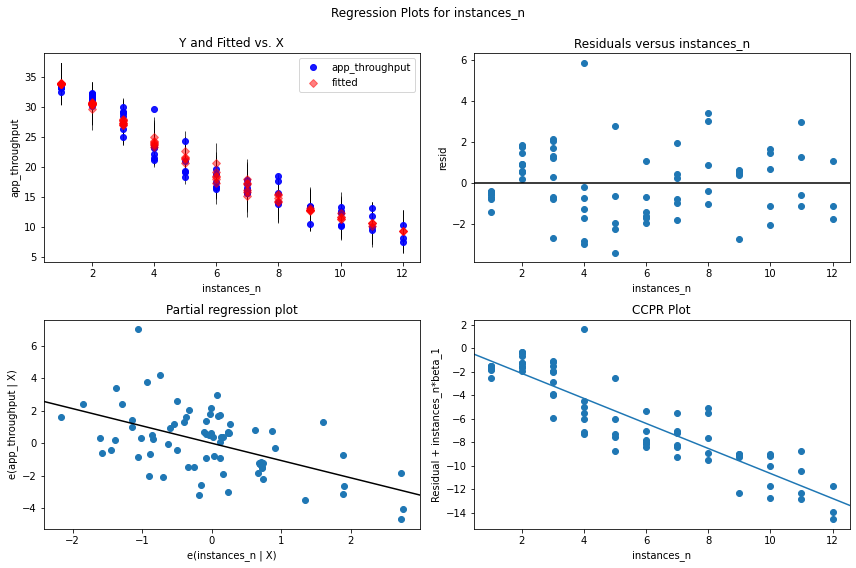

In [34]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

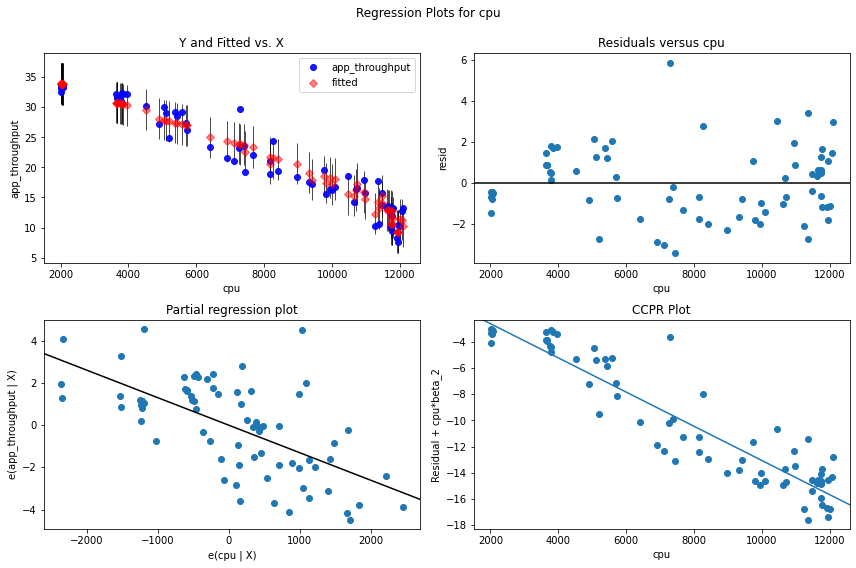

In [35]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     755.0
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           6.80e-41
Time:                        15:35:06   Log-Likelihood:                -646.07
No. Observations:                  77   AIC:                             1296.
Df Residuals:                      75   BIC:                             1301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2260.3305    231.408      9.768      

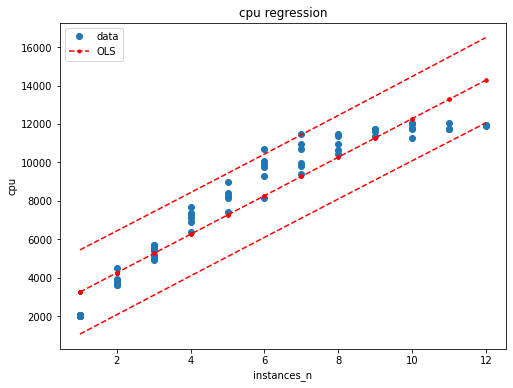

In [36]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

## Linpack 12x20min

In [37]:
experiment_name = 'linpack_12x20'

exp_name, df = next(get_data_with_metrics(experiment_name, experiments_path, instances_n=12))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1592311591,1592311594,NaN,33.3820,2035.0,4.546589e+09,1.0
1,1592311651,1592311654,NaN,33.3700,2034.0,4.547256e+09,1.0
2,1592311711,1592311715,NaN,33.3523,2034.0,4.545925e+09,1.0
3,1592311771,1592311775,NaN,32.2720,2057.0,4.546154e+09,1.0
4,1592311831,1592311836,NaN,33.1085,2044.0,4.545212e+09,1.0


### `app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1796.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           5.21e-85
Time:                        15:35:07   Log-Likelihood:                -326.28
No. Observations:                 151   AIC:                             656.6
Df Residuals:                     149   BIC:                             662.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6673      0.328    105.597      

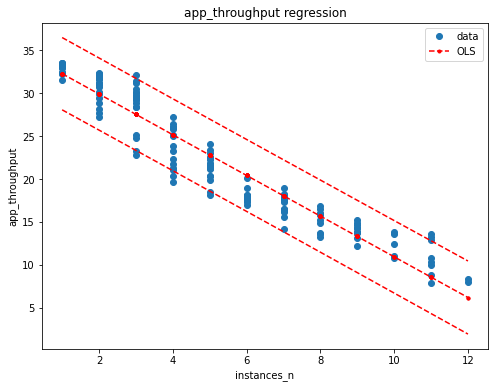

In [38]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')
print(results.summary())

### `app_throughput` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1822.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.90e-85
Time:                        15:35:08   Log-Likelihood:                -325.26
No. Observations:                 151   AIC:                             654.5
Df Residuals:                     149   BIC:                             660.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.5273      0.406     94.955      0.0

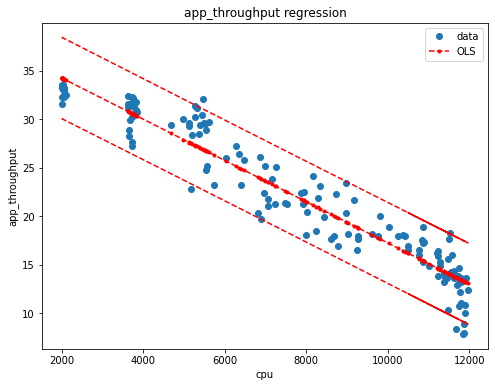

In [39]:
results = fit_regression(data=df, formula='app_throughput ~ cpu')
draw_regression_graph(results, df, metric_name='app_throughput', variable='cpu')
print(results.summary())

### `app_throughput` ~ `instances_n` + `cpu`

In [40]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     1293.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.84e-94
Time:                        15:35:08   Log-Likelihood:                -300.02
No. Observations:                 151   AIC:                             606.0
Df Residuals:                     148   BIC:                             615.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.9478      0.401     92.050      

### Single variable plots

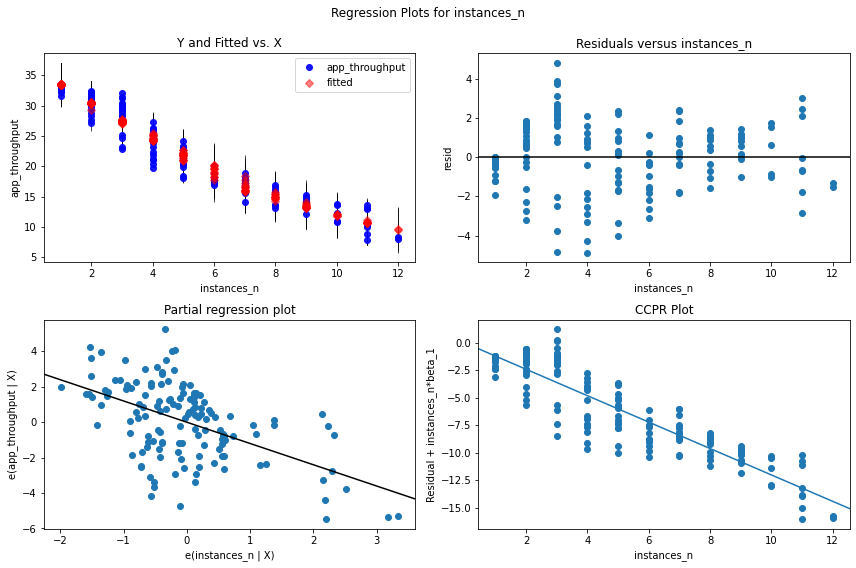

In [41]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

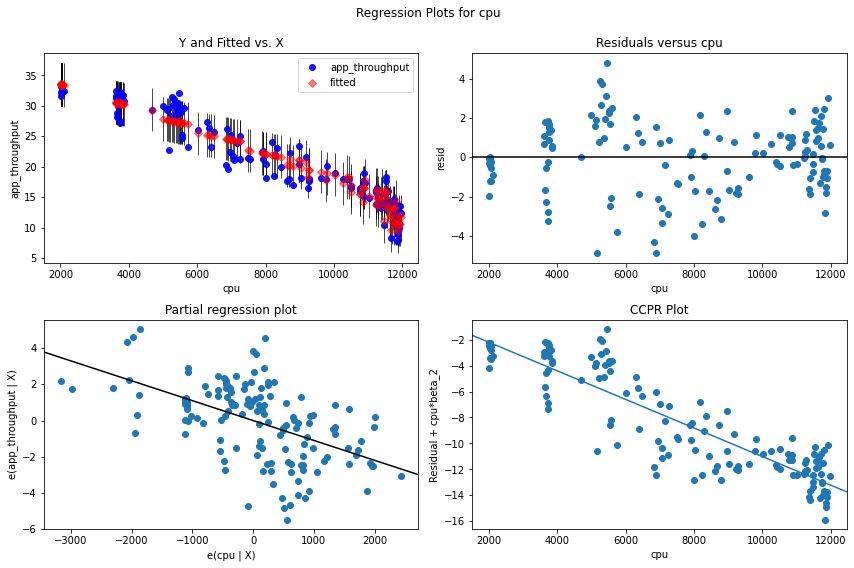

In [42]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1491.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.68e-79
Time:                        15:35:09   Log-Likelihood:                -1262.3
No. Observations:                 151   AIC:                             2529.
Df Residuals:                     149   BIC:                             2535.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2070.8036    161.576     12.816      

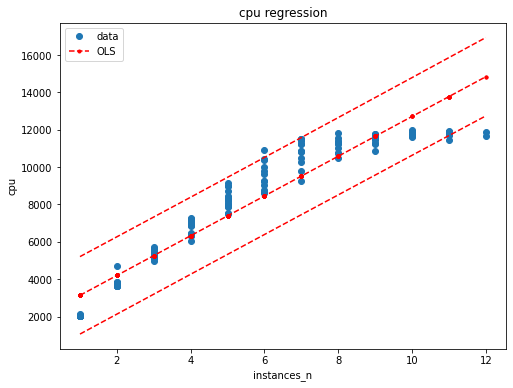

In [43]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

## Wrk 6x10min

In [44]:
experiment_name = 'wrk_6x10'

exp_name, df = next(get_data_with_metrics(experiment_name, experiments_path, instances_n=6))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1590630684,1590630688,10.63,18430.0,5637.0,5.403017e+09,1.0
1,1590630748,1590630748,10.66,18390.0,6295.0,5.402935e+09,1.0
2,1590630812,1590630809,23.02,5420.0,7917.0,5.401166e+09,1.0
3,1590631037,1590631042,34.40,6280.0,9357.0,6.026682e+09,2.0
4,1590631101,1590631103,29.26,3350.0,9394.0,6.015091e+09,2.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     345.0
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.64e-14
Time:                        15:35:09   Log-Likelihood:                -69.017
No. Observations:                  23   AIC:                             142.0
Df Residuals:                      21   BIC:                             144.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.9881      2.549      1.565      

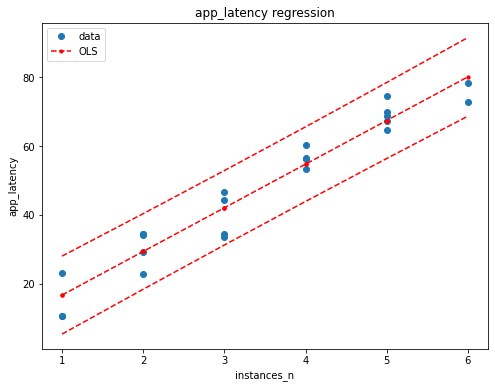

In [45]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')

### `app_latency` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     83.70
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           8.99e-09
Time:                        15:35:09   Log-Likelihood:                -83.409
No. Observations:                  23   AIC:                             170.8
Df Residuals:                      21   BIC:                             173.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -68.5138     12.785     -5.359      0.0

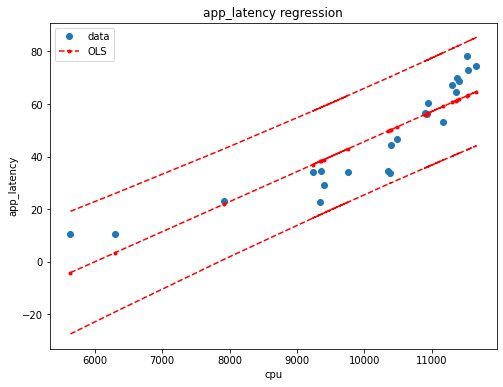

In [46]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')

### `app_latency` ~ `instances_n` + `cpu`

In [47]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     198.2
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           6.54e-14
Time:                        15:35:10   Log-Likelihood:                -66.974
No. Observations:                  23   AIC:                             139.9
Df Residuals:                      20   BIC:                             143.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -13.9079      9.384     -1.482      

### Single variable plots

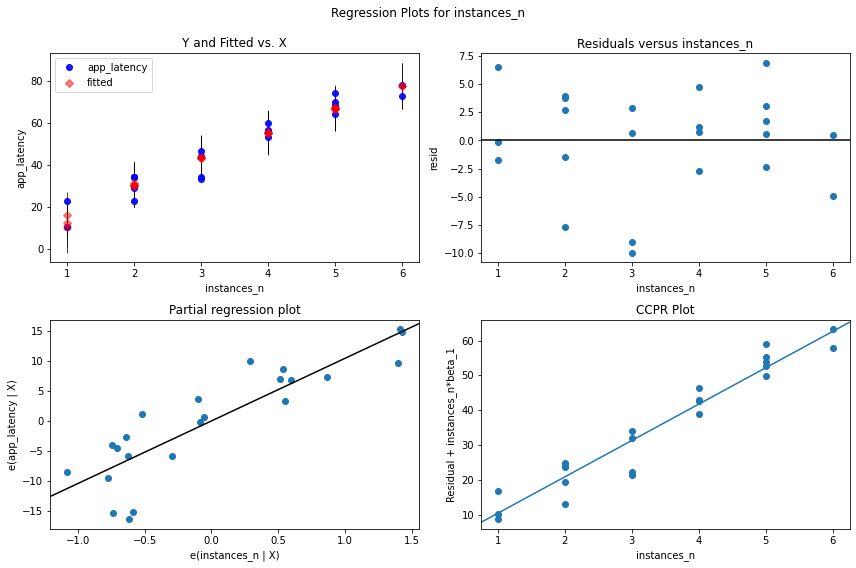

In [48]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

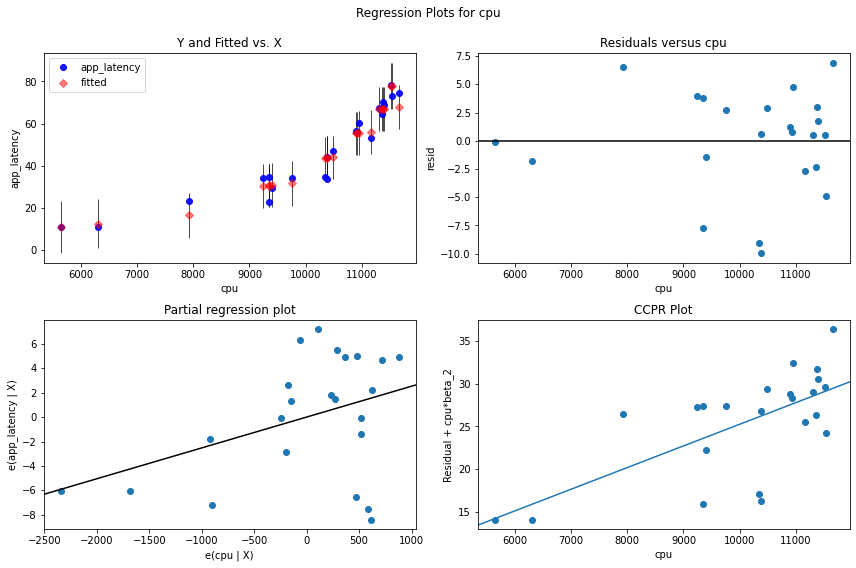

In [49]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     66.79
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           5.84e-08
Time:                        15:35:11   Log-Likelihood:                -185.72
No. Observations:                  23   AIC:                             375.4
Df Residuals:                      21   BIC:                             377.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7087.6865    407.339     17.400      

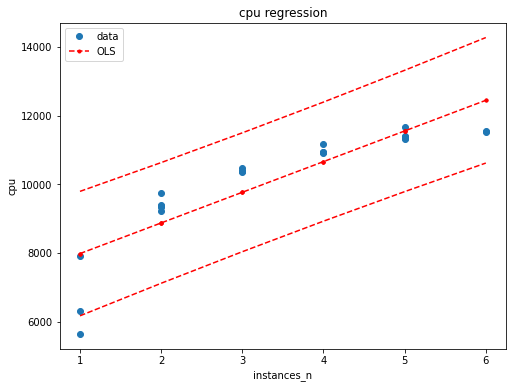

In [50]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

## Wrk 12x10min

In [51]:
experiment_name = 'wrk_12x10'

exp_name, df = next(get_data_with_metrics(experiment_name, experiments_path, instances_n=12))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1591793254,1591793257,21.17,5300.0,6690.0,6.803329e+09,1.0
1,1591793607,1591793610,33.10,3090.0,9134.0,6.910165e+09,2.0
2,1591793672,1591793671,32.78,3020.0,9469.0,6.913380e+09,2.0
3,1591793737,1591793732,31.08,4100.0,9717.0,6.897734e+09,2.0
4,1591794095,1591794096,31.03,4130.0,9225.0,6.900322e+09,2.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1635.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           4.62e-34
Time:                        15:35:11   Log-Likelihood:                -125.99
No. Observations:                  42   AIC:                             256.0
Df Residuals:                      40   BIC:                             259.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.5402      1.708     10.270      

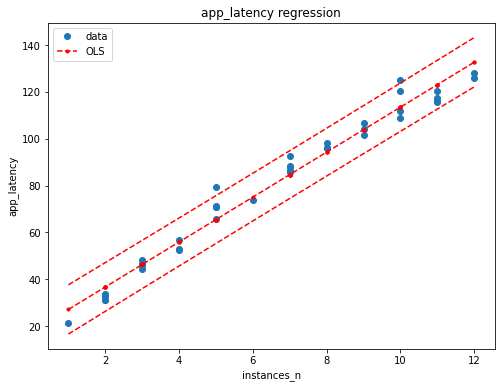

In [52]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

### `app_latency` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     88.82
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.04e-11
Time:                        15:35:11   Log-Likelihood:                -179.86
No. Observations:                  42   AIC:                             363.7
Df Residuals:                      40   BIC:                             367.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -192.5900     28.973     -6.647      0.0

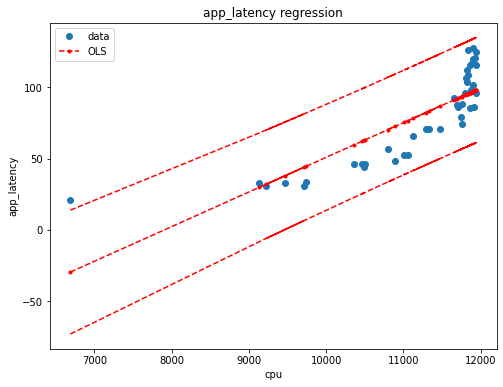

In [53]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')
print(results.summary())

### `app_latency` ~ `instances_n` + `cpu`

In [54]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1197.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           9.86e-36
Time:                        15:35:12   Log-Likelihood:                -117.61
No. Observations:                  42   AIC:                             241.2
Df Residuals:                      39   BIC:                             246.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.2759      9.215     -2.417      

### Single variable plots

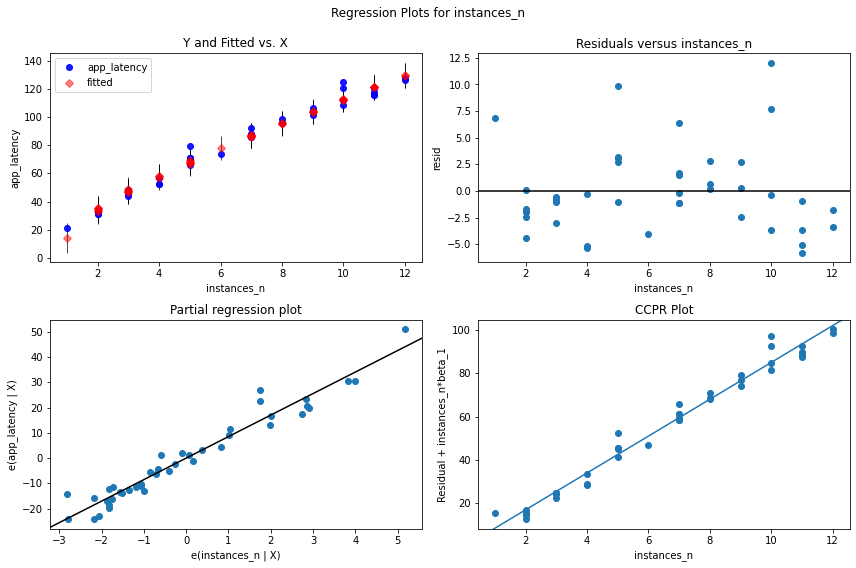

In [55]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

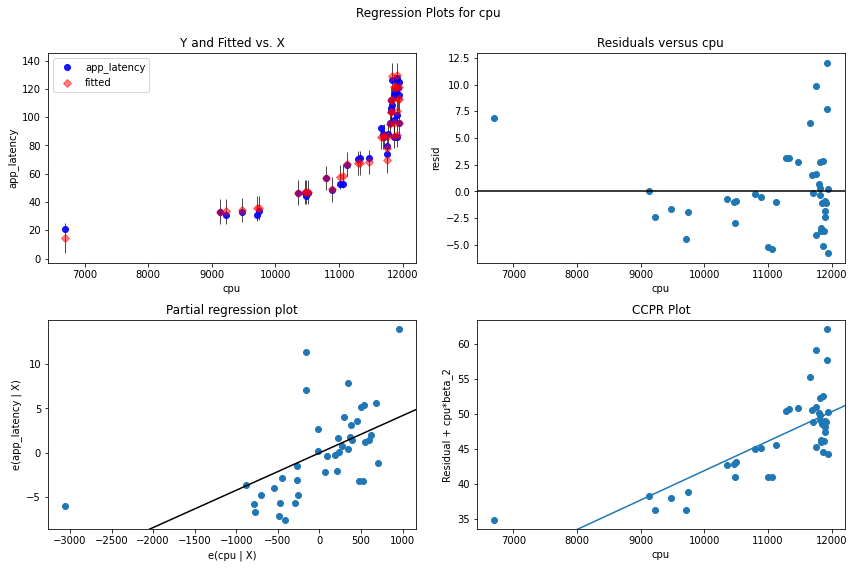

In [56]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     64.17
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           7.65e-10
Time:                        15:35:13   Log-Likelihood:                -332.55
No. Observations:                  42   AIC:                             669.1
Df Residuals:                      40   BIC:                             672.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    9491.7034    233.538     40.643      

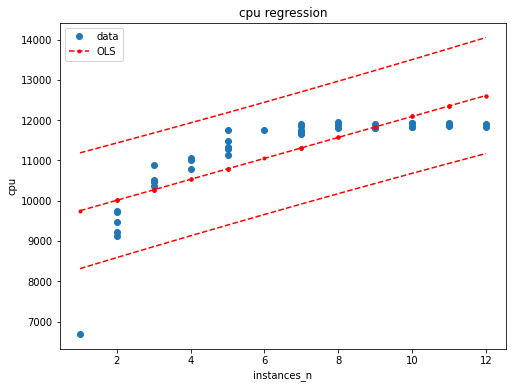

In [57]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

## Wrk 12x20min

In [58]:
experiment_name = 'wrk_12x20'

exp_name, df = next(get_data_with_metrics(experiment_name, experiments_path, instances_n=12))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1591802843,1591802848,15.24,8880.0,7167.0,4.690260e+09,1.0
1,1591802907,1591802908,10.08,20180.0,5906.0,4.676293e+09,1.0
2,1591802971,1591802969,20.20,5360.0,7869.0,4.687049e+09,1.0
3,1591803449,1591803453,21.11,5340.0,6597.0,4.683792e+09,1.0
4,1591803513,1591803514,10.05,20140.0,6163.0,4.669866e+09,1.0


### `app_latency` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     2273.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.65e-60
Time:                        15:35:14   Log-Likelihood:                -264.11
No. Observations:                  82   AIC:                             532.2
Df Residuals:                      80   BIC:                             537.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      14.0505      1.468      9.574      

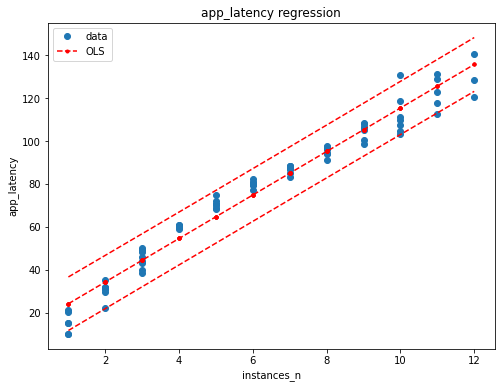

In [59]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')
print(results.summary())

### `app_latency` ~ `cpu`

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     201.8
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.39e-23
Time:                        15:35:14   Log-Likelihood:                -351.11
No. Observations:                  82   AIC:                             706.2
Df Residuals:                      80   BIC:                             711.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -148.2236     15.911     -9.316      0.0

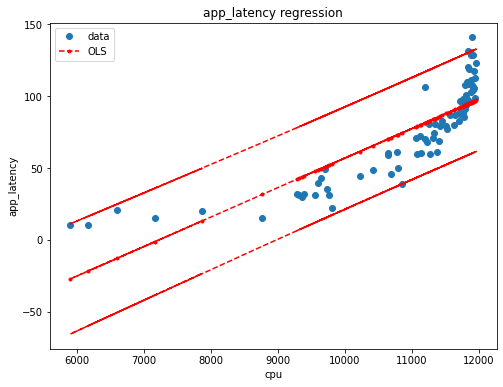

In [60]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')
print(results.summary())

### `app_latency` ~ `instances_n` + `cpu`

In [61]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1787.
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           1.71e-66
Time:                        15:35:14   Log-Likelihood:                -245.55
No. Observations:                  82   AIC:                             497.1
Df Residuals:                      79   BIC:                             504.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -25.1343      5.946     -4.227      

### Single variable plots

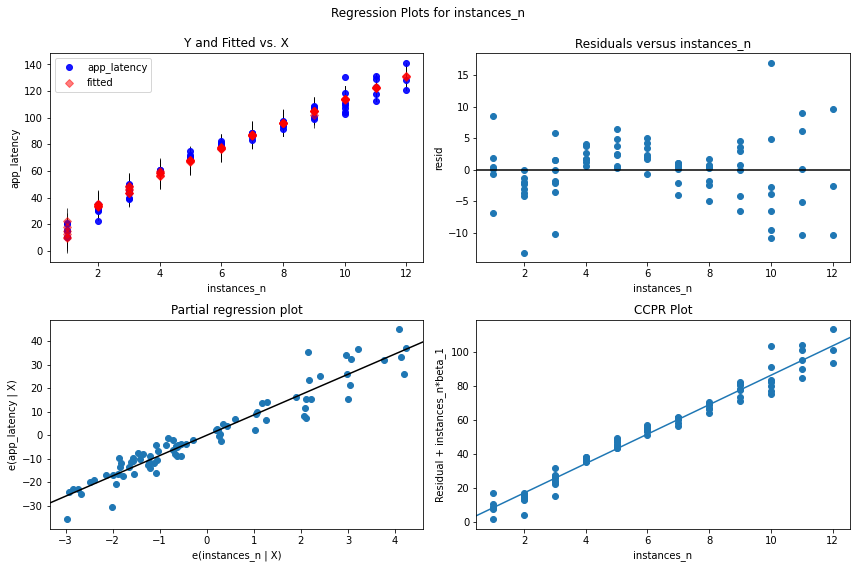

In [62]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

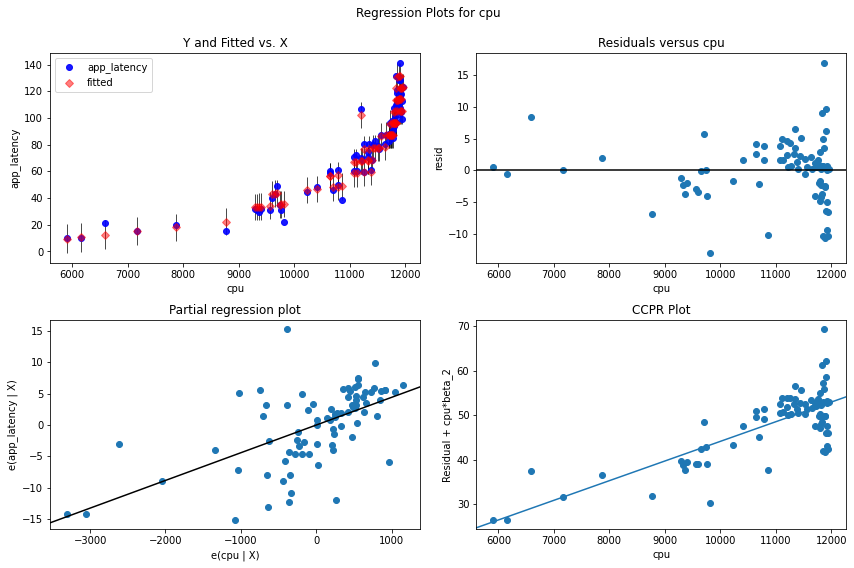

In [63]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     134.5
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           8.14e-19
Time:                        15:35:15   Log-Likelihood:                -667.34
No. Observations:                  82   AIC:                             1339.
Df Residuals:                      80   BIC:                             1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8875.9065    200.554     44.257      

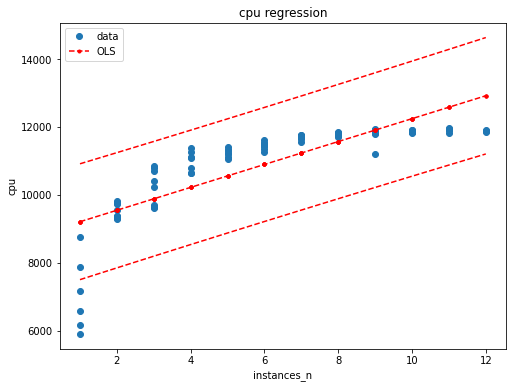

In [64]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

## Hadoop 6x20min

In [65]:
experiment_name = 'hadoop_6x20'

exp_name, df = next(get_data_with_metrics(experiment_name, experiments_path, instances_n=6))
df['app_throughput'] = df['app_throughput'].astype(float)

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1591913731,1591913729,24710.0,40469.0,1464.0,7.047311e+09,1.0
1,1591914209,1591914213,25673.0,38951.0,1345.0,7.115739e+09,1.0
2,1591914276,1591914274,24732.0,40433.0,1449.0,7.137055e+09,1.0
3,1591914683,1591914687,25273.0,39567.0,1370.0,7.217549e+09,1.0
4,1591914749,1591914748,23754.0,42098.0,1499.0,7.238173e+09,1.0


### `app_throughput` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     77.77
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           4.33e-07
Time:                        15:35:16   Log-Likelihood:                -140.02
No. Observations:                  16   AIC:                             284.0
Df Residuals:                      14   BIC:                             285.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.218e+04    793.249     53.174      

/home/godul/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


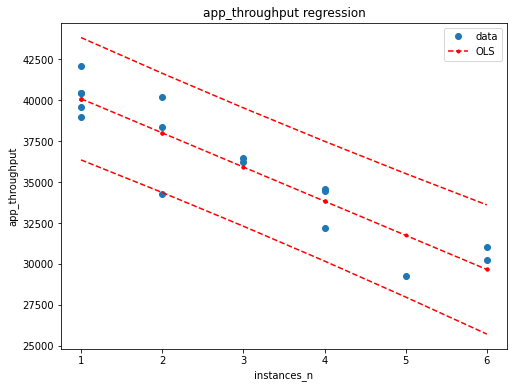

In [66]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')

### `app_throughput` ~ `cpu`

/home/godul/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     72.29
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           6.69e-07
Time:                        15:35:16   Log-Likelihood:                -140.51
No. Observations:                  16   AIC:                             285.0
Df Residuals:                      14   BIC:                             286.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.241e+04    845.010     50.190      0.0

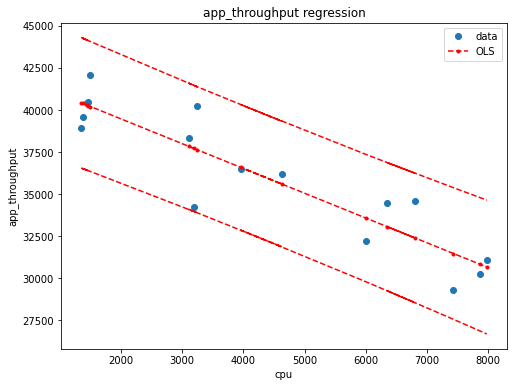

In [67]:
results = fit_regression(data=df, formula='app_throughput ~ cpu')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_throughput', variable='cpu')

### `app_throughput` ~ `instances_n` + `cpu`

In [68]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     36.80
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           4.43e-06
Time:                        15:35:16   Log-Likelihood:                -139.89
No. Observations:                  16   AIC:                             285.8
Df Residuals:                      13   BIC:                             288.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.229e+04    851.563     49.663      

/home/godul/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


### Single variable plots

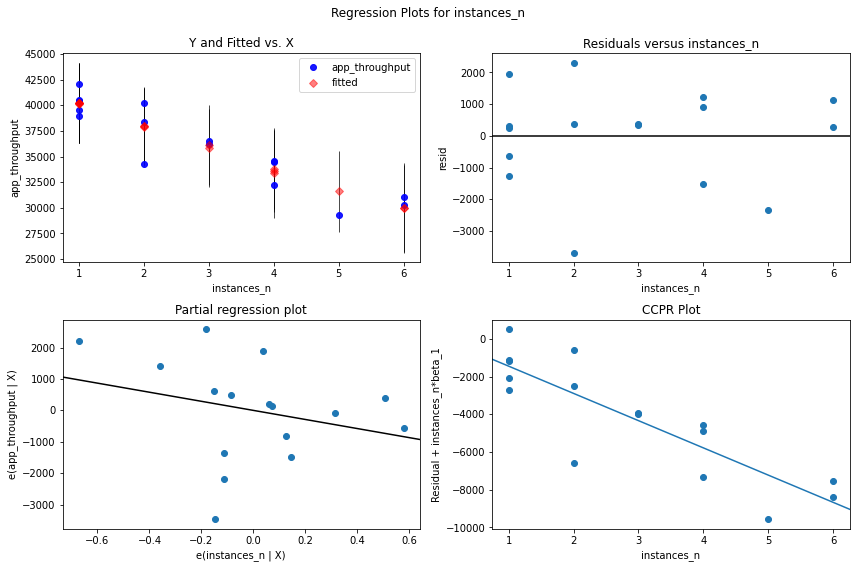

In [69]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

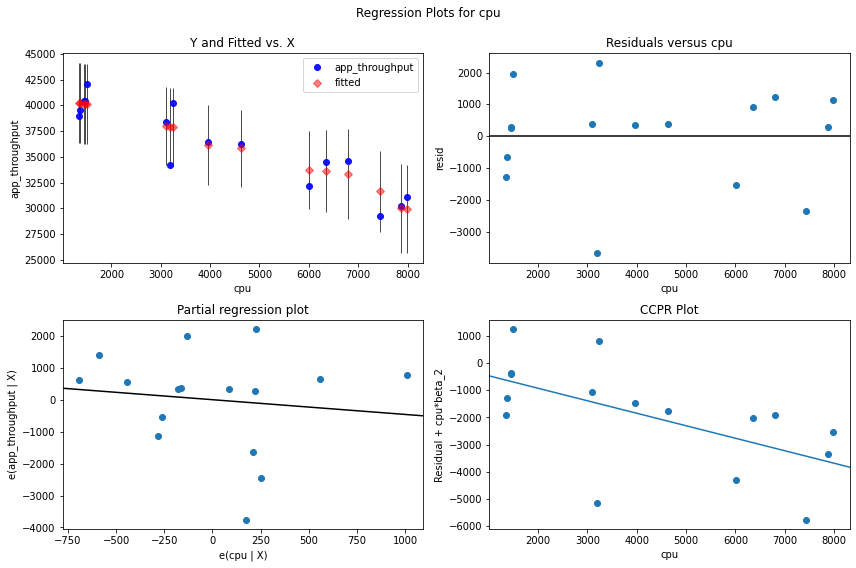

In [70]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

### `cpu` ~ `instances_n`

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     455.5
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           4.45e-12
Time:                        15:35:17   Log-Likelihood:                -119.36
No. Observations:                  16   AIC:                             242.7
Df Residuals:                      14   BIC:                             244.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     241.5079    218.082      1.107      

/home/godul/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


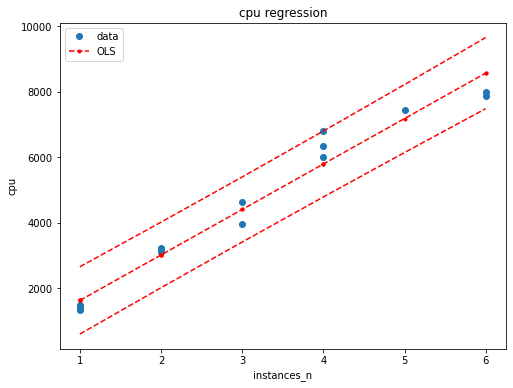

In [71]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')